In [2]:
%matplotlib inline
# Importing standard Qiskit libraries and configuring account
from qiskit import  QuantumRegister, ClassicalRegister, QuantumCircuit, execute, Aer, IBMQ
from qiskit.compiler import transpile, assemble
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from qiskit_textbook.tools import array_to_latex

# Loading your IBM Q account(s)
provider = IBMQ.load_account()

/home/ludvins/.local/lib/python3.8/site-packages/qiskit/providers/ibmq/ibmqfactory.py:192: UserWarning: Timestamps in IBMQ backend properties, jobs, and job results are all now in local time instead of UTC.
  warnings.warn('Timestamps in IBMQ backend properties, jobs, and job results '


Realice el circuito cuántico que equivale a un sumador de dos bits.

In [15]:
# Create 2 qubits
q = QuantumRegister(4, 'q')

c = ClassicalRegister(2, 'c')

# Create a circuit
circuit = QuantumCircuit(q, c)

circuit.x(q[0])
circuit.x(q[1])
circuit.barrier()

circuit.cnot(q[0], q[2])
circuit.cnot(q[1], q[2])
circuit.toffoli(q[0], q[1], q[3])
circuit.barrier()

circuit.measure([q[2], q[3]], [c[0], c[1]])

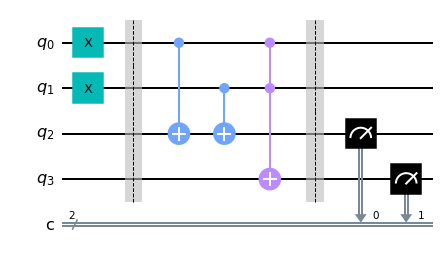

In [16]:
circuit.draw(output='mpl')

El funcionamiento del circuito es el siguiente, en caso de existir un valor de $1$ en $q_0$ y/o $q_1$, se sumarán (en binario) estos valores en la entrada $q_2$, es decir, $q_2 = (q_0 + q_1)%2$. Por otro lado, en caso de que ambos registros sean $1$, se altera el valor de $q_3$ asignandole un 1, es decir, $q_3 = q_0 \& q_1$.

Al solo utilizar puertas NOT y CNOT e inicializar los qbits a $0$ o $1$, el circuito no presenta aleatoriedad, permitiendo sumar los valores de los bits.

In [17]:
# Set backend proider
backend = provider.get_backend('ibmq_qasm_simulator')

# Execute the circuit 1024 times
job = execute(circuit, backend, shots=1024)

print('Executing Job...\n')
result = job.result()
counts = result.get_counts(circuit)

print("Results: ", counts)

Executing Job...

Results:  {'10': 1024}
